In [2]:
#Imports
from qutip import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/neill/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['squeeze', 'shape', 'info', 'identity']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
#import heom_fermions_1 as heom_fermions

import heom_fermions_old as heom_fermions
from heom_fmotd import FermionicHEOMSolver #c version
from heom_fmotd_py import FermionicHEOMSolver as FermionicHEOMSolverPy #python version
import time
from scipy.integrate import quad

In [5]:
def deltafun(j,k):
    if j==k: 
        return 1.
    else:
        return 0.

In [6]:

from scipy.integrate import quad
import scipy as scipy

options = Options(nsteps=15000, store_states=True, rtol=1e-14, atol=1e-14)


In [26]:
d1.dims[0]


[2, 16]

In [27]:

from qutip.states import enr_state_dictionaries

def get_aux_matrices(full, level, N_baths, Nk, N_cut, shape, dims):
    """
    Extracts the auxiliary matrices at a particular level
    from the full hierarchy ADOs.
    
    Parameters
    ----------
    full: ndarray
        A 2D array of the time evolution of the ADOs.
    
    level: int
        The level of the hierarchy to get the ADOs.
        
    N_cut: int
        The hierarchy cutoff.
    
    k: int
        The total number of exponentials used in each bath (assumed equal).
    
    N_baths: int
        The number of baths.
        
    shape : int
        the size of the ''system'' hilbert space
        
    dims : list
        the dimensions of the system hilbert space
    """
    #Note: Max N_cut is Nk*N_baths
    nstates, state2idx, idx2state = enr_state_dictionaries([2]*(Nk*N_baths) ,N_cut)#_heom_state_dictionaries([Nc + 1]*(Nk), Nc)
    aux_indices = []
    
    aux_heom_indices = []
    for stateid in state2idx:
        if np.sum(stateid) == level:
            aux_indices.append(state2idx[stateid])
            aux_heom_indices.append(stateid)
    full = np.array(full)
    aux = []

    for i in aux_indices:
        qlist = [Qobj(full[k, i, :].reshape(shape, shape).T,dims=dims) for k in range(len(full))]
        aux.append(qlist)
    return aux, aux_heom_indices, idx2state

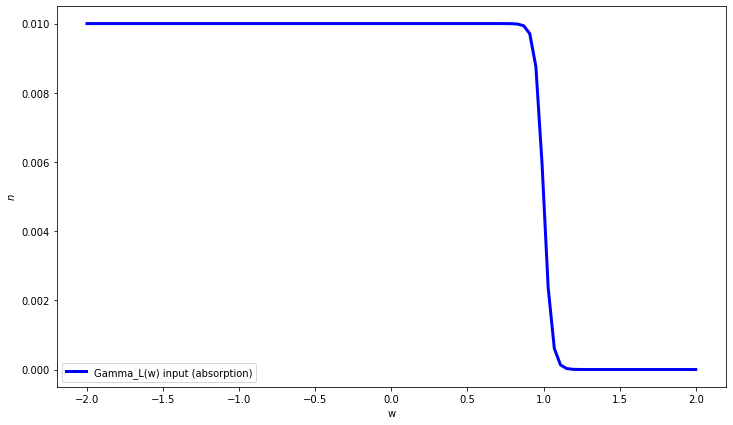

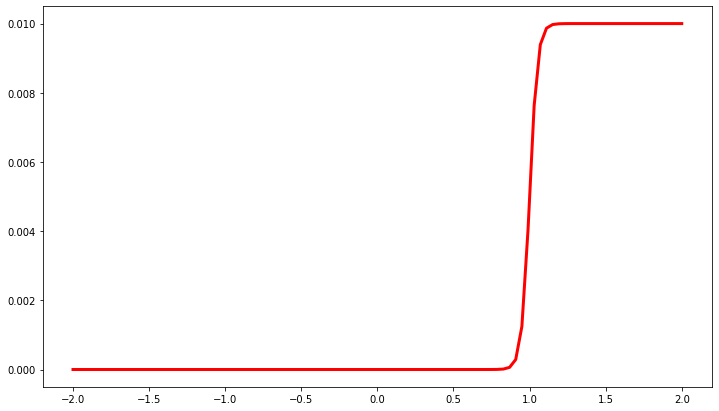

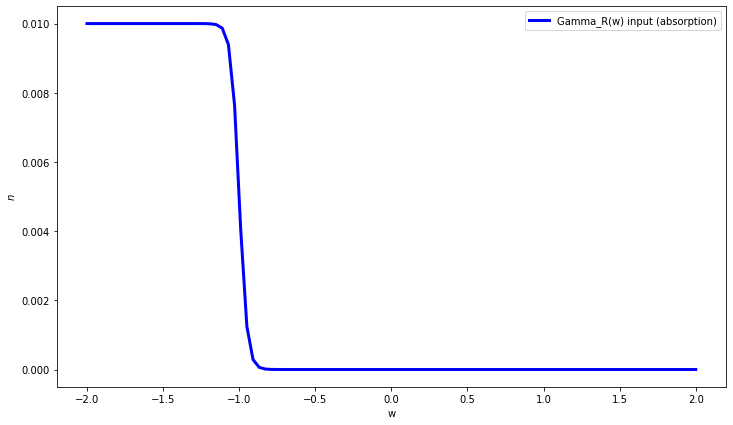

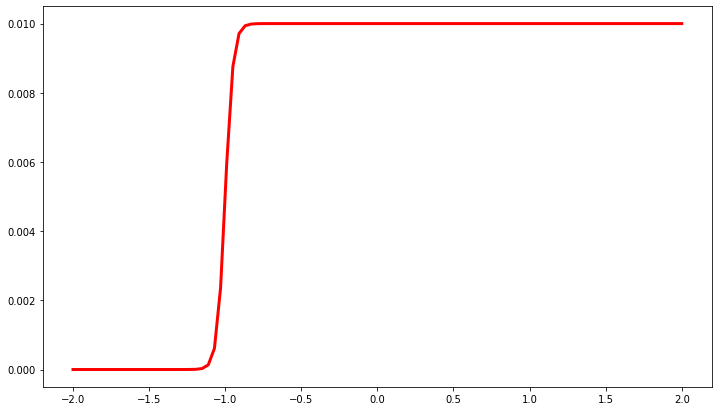

In [8]:
#parameters and spectra check

#thoss
Gamma = 0.01
#phillip
#Gamma =10

W = 10**4
#phillip
#W=0.1
#pade paper
#Gamma = 1.
#W=1.
 
#T = 300
T = 0.025851991 #in ev
beta = 1./T

theta = 2.
mu_l = theta/2.
mu_r = -theta/2.

w_list = np.linspace(-2,2,100)

def Gamma_L_w(w):
    return Gamma*W**2/((w-mu_l)**2 + W**2)

def Gamma_R_w(w):
    return Gamma*W**2/((w-mu_r)**2 + W**2)


def f(x):
    kB=1.
    return 1/(exp(x)+1.)
def f2(x):
    return 0.5

fig, ax1 = plt.subplots(figsize=(12, 7))
gam_list_in = [Gamma_L_w(w)*f(beta*(w-mu_l)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_L(w) input (absorption)")

#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()
fig, ax2 = plt.subplots(figsize=(12, 7))
#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_L_w(w)*f(-beta*(w-mu_l)) for w in w_list]
spec = [Gamma_L_w(w) for w in w_list]
#print(gam_list)
ax2.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_L(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")

fig, ax1 = plt.subplots(figsize=(12, 7))
gam_list_in = [Gamma_R_w(w)*f(beta*(w-mu_r)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_R(w) input (absorption)")

#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()
fig, ax2 = plt.subplots(figsize=(12, 7))
#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_R_w(w)*f(-beta*(w-mu_r)) for w in w_list]
spec = [Gamma_R_w(w) for w in w_list]
#print(gam_list)
ax2.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_R(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")


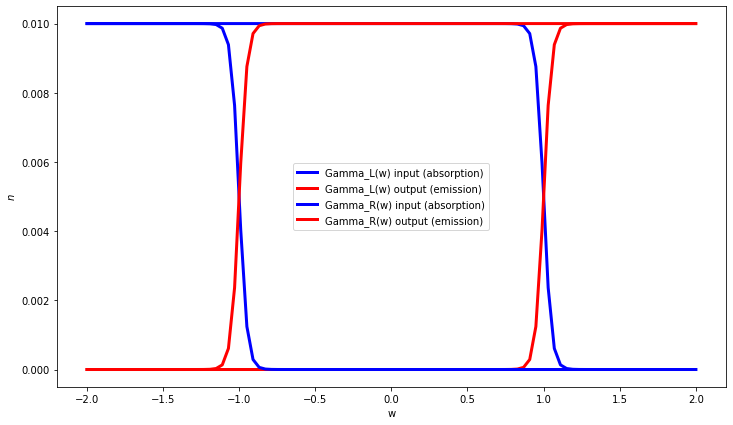

In [9]:

fig, ax1 = plt.subplots(figsize=(12, 7))
gam_list_in = [Gamma_L_w(w)*f(beta*(w-mu_l)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_L(w) input (absorption)")

#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()

#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_L_w(w)*f(-beta*(w-mu_l)) for w in w_list]
spec = [Gamma_L_w(w) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_L(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")

gam_list_in = [Gamma_R_w(w)*f(beta*(w-mu_r)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_R(w) input (absorption)")



#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_R_w(w)*f(-beta*(w-mu_r)) for w in w_list]
spec = [Gamma_R_w(w) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_R(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")
#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()

In [ ]:
#Try integrable 2-bath model
#here I use paramaers from phillips paper
#this collates pade parameters

rhoHssPlistl13n2N11 = []
fullssPlistl13n2N11 = []

newrhoHssPlistl13n2N11 = []
newfullssPlistl13n2N11 = []
#theta_list = np.linspace(0,2,50)
theta_list = np.linspace(1,1,1)
for theta in theta_list:
    print("------------- theta:",theta)
    mu_l = theta/2.
    mu_r = -theta/2.


    tlist = np.linspace(0,0.001,100)



    lmax = 13



    #beta = 1./T
    #beta = np.inf

    w_list = np.linspace(-2,2,100)

    def Gamma_L_w(w):
        return Gamma*W**2/((w-mu_l)**2 + W**2)

    def Gamma_w(w, mu):
        return Gamma*W**2/((w-mu)**2 + W**2)


    def f(x):
        kB=1.
        return 1/(exp(x)+1.)





    #Next compare pade decomp to numerical integration

    Alpha =np.zeros((2*lmax,2*lmax))
    for j in range(2*lmax):
        for k in range(2*lmax):
            Alpha[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)-1)*(2*(k+1)-1))

    eigvalsA=eigvalsh(Alpha)  

    eps = []
    for val in  eigvalsA[0:lmax]:
        #print(-2/val)
        eps.append(-2/val)


    AlphaP =np.zeros((2*lmax-1,2*lmax-1))
    for j in range(2*lmax-1):
        for k in range(2*lmax-1):
            AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)+1)*(2*(k+1)+1))
            #AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+2)-1)*(2*(k+2)-1))

    eigvalsAP=eigvalsh(AlphaP)    


    chi = []
    for val in  eigvalsAP[0:lmax-1]:
        #print(-2/val)
        chi.append(-2/val)


    eta_list=[0.5*lmax*(2*(lmax + 1) - 1)*( 
      np.prod([chi[k]**2 - eps[j]**2 for k in range(lmax - 1)])/
        np.prod([eps[k]**2 - eps[j]**2 +deltafun(j,k) for k in range(lmax)])) 
              for j in range(lmax)]


    #kappa = [0,1,1,1.56,14.44]
    kappa = [0]+eta_list
    print(kappa)
    #epsilon = [0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi]
    #print([0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi])
    epsilon = [0]+eps
    print(epsilon)
    def f_approx(x):
        f = 0.5
        for l in range(1,lmax+1):
            f= f - 2*kappa[l]*x/(x**2+epsilon[l]**2)
        return f

    def f(x):
        kB=1.
        return 1/(exp(x)+1.)



    #######

    #####HERE I SET LMAX 0, and comment out hte pade stuff... lets just try with one exponent!!!!

    #now lets try switching it on. urgh.

    #lmax =2

    def C(tlist,sigma,mu):
        eta_list = []
        gamma_list  =[]

        #l = 0
        eta_0 = 0.5*Gamma*W*f_approx(1.0j*beta*W)
        #eta_0 = 0.5*Gamma*W*f(1.0j*beta*W)
        gamma_0 = W - sigma*1.0j*mu
        eta_list.append(eta_0)
        gamma_list.append(gamma_0)
        if lmax>0:
            for l in range(1,lmax+1):
                eta_list.append(-1.0j*(kappa[l]/beta)*Gamma*W**2/(-(epsilon[l]**2/beta**2)+W**2))
                gamma_list.append(epsilon[l]/beta - sigma*1.0j*mu)
        c_tot = []
        for t in tlist:
            c_tot.append(sum([eta_list[l]*exp(-gamma_list[l]*t) for l in range(lmax+1)]))
        return c_tot, eta_list, gamma_list


    #sigma = -  is dsetroy in environment create electron in system


    def c_t_L_num(t,sigma,mu):

        integrand = lambda w: (1/(2*pi))*exp(sigma*1.0j*w*t)*Gamma_w(w,mu)*f(sigma*beta*(w-mu))
        def real_func(x):
            return scipy.real(integrand(x))
        def imag_func(x):
            return scipy.imag(integrand(x))
        #return quad(integrand,-np.inf,np.inf)[0]
        #a= -600000
        #b = 600000

        a= -10**6
        b=10**6
        real_integral = quad(real_func, a, b)
        imag_integral = quad(imag_func, a, b)
        return real_integral[0] + 1.0j * imag_integral[0]


    #tlist = np.linspace(0,1e-3,100)


    cppL,etapL,gampL = C(tlist,1.0,mu_l)

    cpmL,etamL,gammL = C(tlist,-1.0,mu_l)

    #mu_r = -mu_l

    cppR,etapR,gampR = C(tlist,1.0,mu_r)

    cpmR,etamR,gammR = C(tlist,-1.0,mu_r)

    #heom simu on above params (Pade)

    #try and do thos proper model

    Nbos = 11

    d1 = tensor(destroy(2), qeye(Nbos))

    a = tensor(qeye(2), destroy(Nbos))

    e1 = 0.3 #d1 = spin up
    Omega = 0.2
    Lambda = 0.12

    H0 = e1*d1.dag()*d1 + Omega * a.dag()*a + Lambda * (a+a.dag())*d1.dag()*d1

    #Qops = [d1,d1.dag()]
    Qops = [d1.dag(),d1,d1.dag(),d1]


    rho_0 = tensor(basis(2,0)*basis(2,0).dag(),basis(Nbos,0)*basis(Nbos,0).dag())

    Kk=lmax+1
    Ncc=2*2
    Ncc=2*4
    Ncc = 4*Kk
    Ncc = 2
    tlist = np.linspace(0,100,1000)


    eta_list = [etapR,etamR,etapL,etamL]
    #T=0:
    #eta_list = [[Gamma*W/2.],[0.]]
    #eta_list = [[0.],[Gamma*W/2.]]
    print(eta_list)
    gamma_list = [gampR,gammR,gampL,gammL]
    print(gamma_list)
    import time
    start = time.time()
    resultHEOM1=heom_fermions.HSolverFermions(H0, [], Qops,  eta_list, gamma_list,  Ncc, Kk,renorm=False,bnd_cut_approx=False)
    end = time.time()
    print("construct time old code:", end - start)
    start = time.time()
    
    resultHEOM2=FermionicHEOMSolver(H0, Qops,  eta_list, gamma_list,  Ncc, options=options)
    end = time.time()
    print("construct time new code:", end - start)
    #start = time.time()
    #out1P,full1P=resultHEOM1.run(rho_0,tlist)
    #end = time.time()
    #print(end - start)

    start = time.time()

    rhossHP,fullssP=resultHEOM1.ss(rho_0,H0)
    end = time.time()
    print("ss time old",end - start)
    start = time.time()

    rhossHP2,fullssP2=resultHEOM2.steady_state(H0,rho_0)
    end = time.time()
    print("ss time new",end - start)
    
    rhoHssPlistl13n2N11.append(rhossHP)
    fullssPlistl13n2N11.append(fullssP)
    
    newrhoHssPlistl13n2N11.append(rhossHP2)
    newfullssPlistl13n2N11.append(fullssP2)
    #Pg1 = expect(out1.states,sz)
    #Pgg1 = expect(out1.states,sm*sm.dag())
    #1mev = 1.51926741 × 10^12 hertz 


    #fig, ax1 = plt.subplots(figsize=(12, 7))

    #ax1.plot(tlist,expect(out1P.states,basis(2,1)*basis(2,1).dag()), color="black", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.set_ylim(0, 1)
    #ax1.set_xlabel("t")
    #ax1.set_ylabel(r"pop")
    #ax1.legend()


------------- theta: 1.0
[0, 0.9999999999999737, 0.9999999999999739, 0.9999999999999728, 0.9999999999999865, 1.0000000012338204, 1.000004717559511, 1.0016433599330683, 1.068904751759469, 1.5215569685907313, 2.6859138318921176, 5.500483547857554, 15.632670515632622, 142.0888223055412]
[0, 3.141592653589793, 9.424777960769381, 15.707963267948962, 21.99114857512857, 28.274333883086825, 34.55752325397291, 40.84270607122576, 47.256172099829456, 55.093414743766374, 67.83481329266519, 92.09955352618135, 150.55171180165394, 447.42712087095776]
[[(25+0.045370294084901217j), -0.00025851991001704547j, -0.0002585199101534635j, -0.00025851991042629926j, -0.0002585199108355568j, -0.00025851991170019957j, -0.0002585211316463929j, -0.0002589447541488439j, -0.00027633316434761475j, -0.000393352778559337j, -0.0006943622234425107j, -0.001421984592360288j, -0.004041357186951554j, -0.036732838700312104j], [(25+0.045370294084901217j), -0.00025851991001704547j, -0.0002585199101534635j, -0.0002585199104262992

/home/neill/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [24]:
H0.shape[0]

32

In [19]:
#Try integrable 2-bath model
#here I use paramaers from phillips paper
#this collates pade parameters

rhoHssPlistl5n2N16 = []
fullssPlistl5n2N16 = []
newrhoHssPlistl5n2N16 = []
newfullssPlistl5n2N16 = []
theta_list = np.linspace(0,2,50)
#theta_list = np.linspace(1,1,1)

#theta_list = np.linspace(0.08163265306122448,0.08163265306122448,1)
for theta in theta_list:
    print("------------- theta:",theta)
    mu_l = theta/2.
    mu_r = -theta/2.


    tlist = np.linspace(0,0.001,100)



    lmax = 5



    #beta = 1./T
    #beta = np.inf

    w_list = np.linspace(-2,2,100)

    def Gamma_L_w(w):
        return Gamma*W**2/((w-mu_l)**2 + W**2)

    def Gamma_w(w, mu):
        return Gamma*W**2/((w-mu)**2 + W**2)


    def f(x):
        kB=1.
        return 1/(exp(x)+1.)





    #Next compare pade decomp to numerical integration

    Alpha =np.zeros((2*lmax,2*lmax))
    for j in range(2*lmax):
        for k in range(2*lmax):
            Alpha[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)-1)*(2*(k+1)-1))

    eigvalsA=eigvalsh(Alpha)  

    eps = []
    for val in  eigvalsA[0:lmax]:
        #print(-2/val)
        eps.append(-2/val)


    AlphaP =np.zeros((2*lmax-1,2*lmax-1))
    for j in range(2*lmax-1):
        for k in range(2*lmax-1):
            AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)+1)*(2*(k+1)+1))
            #AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+2)-1)*(2*(k+2)-1))

    eigvalsAP=eigvalsh(AlphaP)    


    chi = []
    for val in  eigvalsAP[0:lmax-1]:
        #print(-2/val)
        chi.append(-2/val)


    eta_list=[0.5*lmax*(2*(lmax + 1) - 1)*( 
      np.prod([chi[k]**2 - eps[j]**2 for k in range(lmax - 1)])/
        np.prod([eps[k]**2 - eps[j]**2 +deltafun(j,k) for k in range(lmax)])) 
              for j in range(lmax)]


    #kappa = [0,1,1,1.56,14.44]
    kappa = [0]+eta_list
    print(kappa)
    #epsilon = [0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi]
    #print([0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi])
    epsilon = [0]+eps
    print(epsilon)
    def f_approx(x):
        f = 0.5
        for l in range(1,lmax+1):
            f= f - 2*kappa[l]*x/(x**2+epsilon[l]**2)
        return f

    def f(x):
        kB=1.
        return 1/(exp(x)+1.)



    #######

    #####HERE I SET LMAX 0, and comment out hte pade stuff... lets just try with one exponent!!!!

    #now lets try switching it on. urgh.

    #lmax =2

    def C(tlist,sigma,mu):
        eta_list = []
        gamma_list  =[]

        #l = 0
        eta_0 = 0.5*Gamma*W*f_approx(1.0j*beta*W)
        #eta_0 = 0.5*Gamma*W*f(1.0j*beta*W)
        gamma_0 = W - sigma*1.0j*mu
        eta_list.append(eta_0)
        gamma_list.append(gamma_0)
        if lmax>0:
            for l in range(1,lmax+1):
                eta_list.append(-1.0j*(kappa[l]/beta)*Gamma*W**2/(-(epsilon[l]**2/beta**2)+W**2))
                gamma_list.append(epsilon[l]/beta - sigma*1.0j*mu)
        c_tot = []
        for t in tlist:
            c_tot.append(sum([eta_list[l]*exp(-gamma_list[l]*t) for l in range(lmax+1)]))
        return c_tot, eta_list, gamma_list


    #sigma = -  is dsetroy in environment create electron in system


    def c_t_L_num(t,sigma,mu):

        integrand = lambda w: (1/(2*pi))*exp(sigma*1.0j*w*t)*Gamma_w(w,mu)*f(sigma*beta*(w-mu))
        def real_func(x):
            return scipy.real(integrand(x))
        def imag_func(x):
            return scipy.imag(integrand(x))
        #return quad(integrand,-np.inf,np.inf)[0]
        #a= -600000
        #b = 600000

        a= -10**6
        b=10**6
        real_integral = quad(real_func, a, b)
        imag_integral = quad(imag_func, a, b)
        return real_integral[0] + 1.0j * imag_integral[0]


    #tlist = np.linspace(0,1e-3,100)


    cppL,etapL,gampL = C(tlist,1.0,mu_l)

    cpmL,etamL,gammL = C(tlist,-1.0,mu_l)

    #mu_r = -mu_l

    cppR,etapR,gampR = C(tlist,1.0,mu_r)

    cpmR,etamR,gammR = C(tlist,-1.0,mu_r)

    #heom simu on above params (Pade)

    #try and do thos proper model

    Nbos = 16

    d1 = tensor(destroy(2), qeye(Nbos))

    a = tensor(qeye(2), destroy(Nbos))

    e1 = 0.3 #d1 = spin up
    Omega = 0.2
    Lambda = 0.12

    H0 = e1*d1.dag()*d1 + Omega * a.dag()*a + Lambda * (a+a.dag())*d1.dag()*d1

    #Qops = [d1,d1.dag()]
    Qops = [d1.dag(),d1,d1.dag(),d1]


    rho_0 = tensor(basis(2,0)*basis(2,0).dag(),basis(Nbos,0)*basis(Nbos,0).dag())

    Kk=lmax+1
    Ncc=2*2
    Ncc=2*4
    Ncc = 4*Kk
    Ncc = 2
    tlist = np.linspace(0,100,1000)


    eta_list = [etapR,etamR,etapL,etamL]
    #T=0:
    #eta_list = [[Gamma*W/2.],[0.]]
    #eta_list = [[0.],[Gamma*W/2.]]
    print(eta_list)
    gamma_list = [gampR,gammR,gampL,gammL]
    print(gamma_list)
    
    import time
    #start = time.time()
    #resultHEOM1=heom_fermions.HSolverFermions(H0, [], Qops,  eta_list, gamma_list,  Ncc, Kk,renorm=False,bnd_cut_approx=False)
    #end = time.time()
    #print("construct time old code:", end - start)
    start = time.time()
    
    resultHEOM=FermionicHEOMSolver(H0, Qops,  eta_list, gamma_list,  Ncc, options=options)
    end = time.time()
    print("construct time new code:", end - start)
    #start = time.time()
    #out1P,full1P=resultHEOM1.run(rho_0,tlist)
    #end = time.time()
    #print(end - start)

    #start = time.time()

    #rhossHP,fullssP=resultHEOM1.ss(rho_0,H0)
    #end = time.time()
    #print("ss time old",end - start)
    start = time.time()

    rhossHP,fullssP=resultHEOM.steady_state()
    end = time.time()
    print("ss time new",end - start)
    
   
    print("ss time",end - start)
    rhoHssPlistl5n2N16.append(rhossHP)
    fullssPlistl5n2N16.append(fullssP)
    #newrhoHssPlistl5n2N16.append(rhossHP)
    #newfullssPlistl5n2N16.append(fullssP)
    #Pg1 = expect(out1.states,sz)
    #Pgg1 = expect(out1.states,sm*sm.dag())
    #1mev = 1.51926741 × 10^12 hertz 


    #fig, ax1 = plt.subplots(figsize=(12, 7))

    #ax1.plot(tlist,expect(out1P.states,basis(2,1)*basis(2,1).dag()), color="black", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.set_ylim(0, 1)
    #ax1.set_xlabel("t")
    #ax1.set_ylabel(r"pop")
    #ax1.legend()


------------- theta: 0.0
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j]]
[[(10000+0j), (0.0812164250062695+0j), (0.24364953787505342+0j), (0.40748373629533435+0j), (0.6431072596057126+0j), (1.823255867387885+0j)], [(10

construct time new code: 37.089998722076416
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (308224, 308224)
Input matrix NNZ:   2065768

Analysis and Factorization Stage
--------------------------------
Factorization time:        40.1891
Factorization memory (Mb): 336.1562
NNZ in LU factors:         147291908

Solution Stage
--------------
Solution time:                   1.2428
Solution memory (Mb):            2415.2549
Number of iterative refinements: 4
Total memory (Mb):               2751.4111

ss time new 41.78109073638916
ss time 41.78109073638916
------------- theta: 0.16326530612244897
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.00060

construct time new code: 37.16385531425476
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (308224, 308224)
Input matrix NNZ:   2065768

Analysis and Factorization Stage
--------------------------------
Factorization time:        40.3361
Factorization memory (Mb): 334.0049
NNZ in LU factors:         146742752

Solution Stage
--------------
Solution time:                   1.2517
Solution memory (Mb):            2406.875
Number of iterative refinements: 4
Total memory (Mb):               2740.8799

ss time new 41.93637442588806
ss time 41.93637442588806
------------- theta: 0.32653061224489793
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002

construct time new code: 37.20500349998474
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (308224, 308224)
Input matrix NNZ:   2065768

Analysis and Factorization Stage
--------------------------------
Factorization time:        37.2211
Factorization memory (Mb): 334.415
NNZ in LU factors:         146246206

Solution Stage
--------------
Solution time:                   1.2353
Solution memory (Mb):            2399.2979
Number of iterative refinements: 4
Total memory (Mb):               2733.7129

ss time new 38.8010995388031
ss time 38.8010995388031
------------- theta: 0.4897959183673469
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269

construct time new code: 36.96203589439392
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (308224, 308224)
Input matrix NNZ:   2065768

Analysis and Factorization Stage
--------------------------------
Factorization time:        38.8331
Factorization memory (Mb): 333.1045
NNZ in LU factors:         147157274

Solution Stage
--------------
Solution time:                   1.2743
Solution memory (Mb):            2413.2002
Number of iterative refinements: 4
Total memory (Mb):               2746.3047

ss time new 40.45276236534119
ss time 40.45276236534119
------------- theta: 0.6530612244897959
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002

construct time new code: 37.160661458969116
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (308224, 308224)
Input matrix NNZ:   2065768

Analysis and Factorization Stage
--------------------------------
Factorization time:        38.8933
Factorization memory (Mb): 333.3447
NNZ in LU factors:         147676920

Solution Stage
--------------
Solution time:                   1.2592
Solution memory (Mb):            2421.1289
Number of iterative refinements: 4
Total memory (Mb):               2754.4736

ss time new 40.501367807388306
ss time 40.501367807388306
------------- theta: 0.8163265306122448
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006

construct time new code: 37.03982138633728
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (308224, 308224)
Input matrix NNZ:   2065768

Analysis and Factorization Stage
--------------------------------
Factorization time:        37.5725
Factorization memory (Mb): 330.8867
NNZ in LU factors:         146933118

Solution Stage
--------------
Solution time:                   1.5126
Solution memory (Mb):            2409.7793
Number of iterative refinements: 5
Total memory (Mb):               2740.666

ss time new 39.424906730651855
ss time 39.424906730651855
------------- theta: 0.9795918367346939
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.000600

construct time new code: 36.9372661113739
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (308224, 308224)
Input matrix NNZ:   2065768

Analysis and Factorization Stage
--------------------------------
Factorization time:        32.0942
Factorization memory (Mb): 322.6729
NNZ in LU factors:         148576236

Solution Stage
--------------
Solution time:                   1.4937
Solution memory (Mb):            2434.8516
Number of iterative refinements: 5
Total memory (Mb):               2757.5244

ss time new 33.93847107887268
ss time 33.93847107887268
------------- theta: 1.1428571428571428
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.00060022

construct time new code: 37.03786635398865
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (308224, 308224)
Input matrix NNZ:   2065768

Analysis and Factorization Stage
--------------------------------
Factorization time:        38.6559
Factorization memory (Mb): 333.041
NNZ in LU factors:         146662804

Solution Stage
--------------
Solution time:                   1.5267
Solution memory (Mb):            2405.6553
Number of iterative refinements: 5
Total memory (Mb):               2738.6963

ss time new 40.52763223648071
ss time 40.52763223648071
------------- theta: 1.3061224489795917
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.00060022

construct time new code: 36.95650362968445
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (308224, 308224)
Input matrix NNZ:   2065768

Analysis and Factorization Stage
--------------------------------
Factorization time:        33.353
Factorization memory (Mb): 330.6367
NNZ in LU factors:         146652468

Solution Stage
--------------
Solution time:                   1.2187
Solution memory (Mb):            2405.498
Number of iterative refinements: 4
Total memory (Mb):               2736.1348

ss time new 34.92602586746216
ss time 34.92602586746216
------------- theta: 1.4693877551020407
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.000600226

construct time new code: 36.9106068611145
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (308224, 308224)
Input matrix NNZ:   2065768

Analysis and Factorization Stage
--------------------------------
Factorization time:        43.0372
Factorization memory (Mb): 339.0508
NNZ in LU factors:         146252136

Solution Stage
--------------
Solution time:                   1.2589
Solution memory (Mb):            2399.3887
Number of iterative refinements: 4
Total memory (Mb):               2738.4395

ss time new 44.641942739486694
ss time 44.641942739486694
------------- theta: 1.6326530612244896
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.000600

construct time new code: 37.10535717010498
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (308224, 308224)
Input matrix NNZ:   2065768

Analysis and Factorization Stage
--------------------------------
Factorization time:        38.6201
Factorization memory (Mb): 335.1904
NNZ in LU factors:         146785552

Solution Stage
--------------
Solution time:                   1.2605
Solution memory (Mb):            2407.5283
Number of iterative refinements: 4
Total memory (Mb):               2742.7188

ss time new 40.22224831581116
ss time 40.22224831581116
------------- theta: 1.7959183673469385
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002

construct time new code: 38.07920217514038
Using Intel mkl solver
Solver Initialization
---------------------
Input matrix type:  Complex Non-symmetric
Input matrix shape: (308224, 308224)
Input matrix NNZ:   2065768

Analysis and Factorization Stage
--------------------------------
Factorization time:        42.4048
Factorization memory (Mb): 338.8076
NNZ in LU factors:         146224038

Solution Stage
--------------
Solution time:                   1.2922
Solution memory (Mb):            2398.96
Number of iterative refinements: 4
Total memory (Mb):               2737.7676

ss time new 44.054102182388306
ss time 44.054102182388306
------------- theta: 1.9591836734693877
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002

In [28]:
#I need to generalize this a b it better

aux_1_list_list=[]
aux1_indices_list=[]
aux_2_list_list=[]
aux2_indices_list=[]

#for kk,lam in enumerate(lamlist):
K = Kk  #this is not kk (Ihope)


#aux_1_list, aux1_indices = get_aux_matrices([fullss], 1, 4, K)
#aux_2_list, aux2_indices = get_aux_matrices([fullss], 2, 4, K)

shape = H0.shape[0]
dims = H0.dims
aux_1_list, aux1_indices, idx2state = get_aux_matrices(fullssPlistl5n2N16, 1, 4, K, Ncc, shape, dims)
aux_2_list, aux2_indices, idx2state = get_aux_matrices(fullssPlistl5n2N16, 2, 4, K, Ncc, shape, dims)



d1 = tensor(destroy(2), qeye(Nbos))   #Kk to 2*Kk
#currP = [0.0]+[-1.0j * ((d1*(sum([aux_1_list[gg][t] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][t] for gg in range(Kk)]))).tr()) for t in range(999)]
#currP = [-1.0j * ((d1*(sum([aux_1_list[gg][thet] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][thet] for gg in range(Kk)]))).tr()) for thet, thet2 in enumerate(theta_list)]
#currPl5n2N16 = [1.0j * ((d1*(sum([aux_1_list[gg][thet] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][thet] for gg in range(Kk)]))).tr()) for thet, thet2 in enumerate(theta_list)]
currPl5n2N16 = [1.0j * (((sum([(d1*aux_1_list[gg][thet]).tr() for gg in range(Kk,2*Kk)])))  \
                      -  ((sum([(d1.dag()*aux_1_list[gg][thet]).tr() for gg in range(Kk)])))) \
                for thet, thet2 in enumerate(theta_list)]

In [29]:
currPunitsl5n2N16 = [curr*2.434e-4*1e6 for curr in currPl5n2N16]

In [23]:
qsave(currPunitsl5n2N16)
qsave(fullssPlistl5n2N16)
qsave(rhoHssPlistl5n2N16)

/home/neill/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


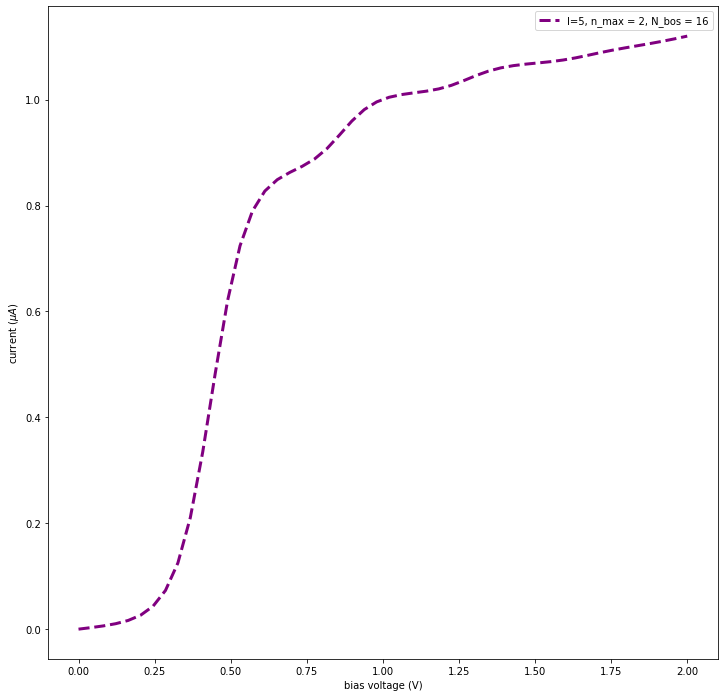

In [30]:


fig, ax1 = plt.subplots(figsize=(12, 12))



#ax1.plot(theta_list,currPunitsl5n2N8, color="red", linestyle='--', linewidth=3, label= r"l=5, n_max = 2, N_bos = 10")
ax1.plot(theta_list,currPunitsl5n2N16, color="purple", linestyle='--', linewidth=3, label= r"l=5, n_max = 2, N_bos = 16")

    #ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
#ax1.set_ylim(0, 1)

ax1.set_xlabel("bias voltage (V)")
ax1.set_ylabel(r"current ($\mu A$)")
ax1.legend()
plt.savefig("fig1a.pdf")

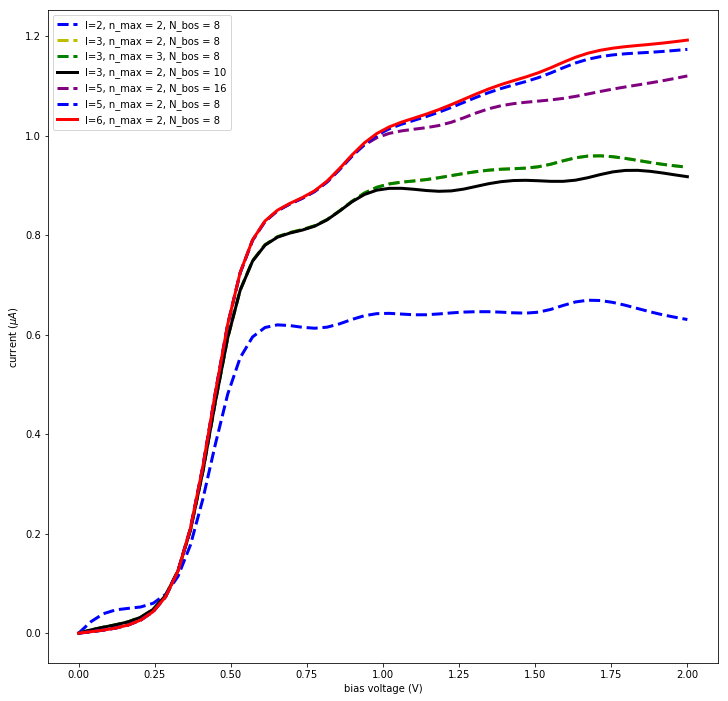

In [76]:


fig, ax1 = plt.subplots(figsize=(12, 12))


ax1.plot(theta_list,currPunitsl2, "b--", linewidth=3, label= r"l=2, n_max = 2, N_bos = 8")
ax1.plot(theta_list,currPunitsl3n2, "y--", linewidth=3, label= r"l=3, n_max = 2, N_bos = 8")
ax1.plot(theta_list,currPunitsl3n3, "g--", linewidth=3, label= r"l=3, n_max = 3, N_bos = 8")
ax1.plot(theta_list,currPunitsl3n2N10, color="black", linewidth=3, label= r"l=3, n_max = 2, N_bos = 10")
#ax1.plot(theta_list,currPunitsl5n2N8, color="red", linestyle='--', linewidth=3, label= r"l=5, n_max = 2, N_bos = 10")
ax1.plot(theta_list,currPunitsl5n2N16, color="purple", linestyle='--', linewidth=3, label= r"l=5, n_max = 2, N_bos = 16")
ax1.plot(theta_list,currPunitsl5n2N8, color="blue", linestyle='--', linewidth=3, label= r"l=5, n_max = 2, N_bos = 8")
ax1.plot(theta_list,currPunits, "r-", linewidth=3, label= r"l=6, n_max = 2, N_bos = 8") 
    #ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
#ax1.set_ylim(0, 1)

ax1.set_xlabel("bias voltage (V)")
ax1.set_ylabel(r"current ($\mu A$)")
ax1.legend()
plt.savefig("fig1a.pdf")